In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# importar y cargar el dataset
data = pd.read_csv('student_habits_performance.csv')

# Analisis exploratorio de datos (EDA) + feature engineering

In [110]:
data.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [112]:
data.isnull().sum() #revisamos si hay valores nulos

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [113]:
data.describe() #describamos los datos númericos

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [114]:
# eliminaremos la columna student_id pues no otorga información relevante para el problema
data = data.drop(columns=["student_id"])

In [115]:
#eliminar valores nulos
for col in data.columns:
    data = data[data[col].notna()]
data

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [116]:
data.isnull().sum() 

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [ ]:
# definiremos las variables numericas para el histograma
data_numerico = data[["age","study_hours_per_day","social_media_hours","netflix_hours","attendance_percentage","sleep_hours","exercise_frequency","mental_health_rating","exam_score"]]

In [ ]:
#Distribuiremos las variables númericas a traves de un histograma 
def histograma(data, column):
    plt.figure(figsize=(6,6))
    sns.histplot(data[column], bins = 20)
    plt.title(f"distribucion {column}")
    plt.show()

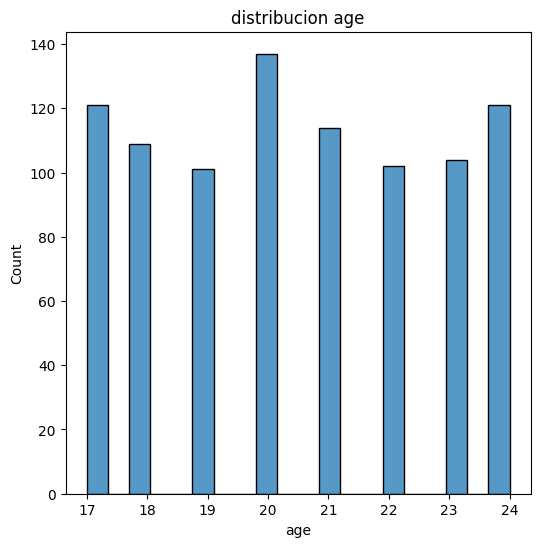

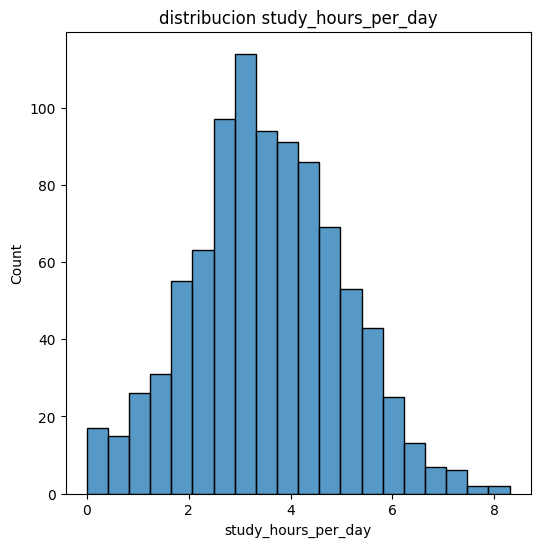

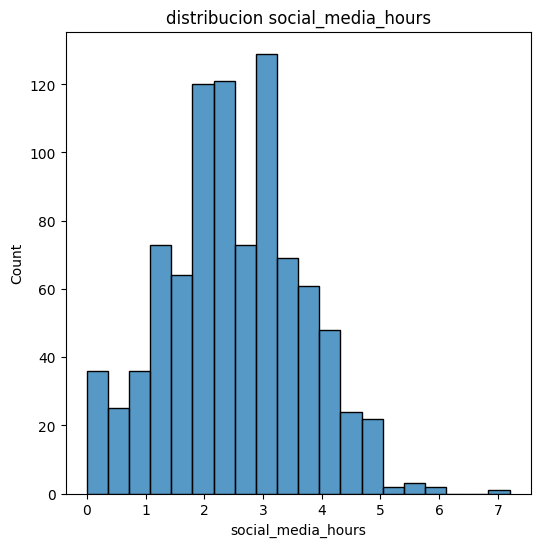

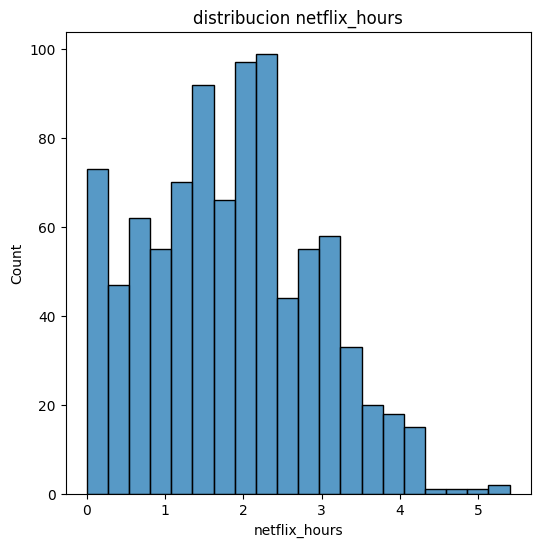

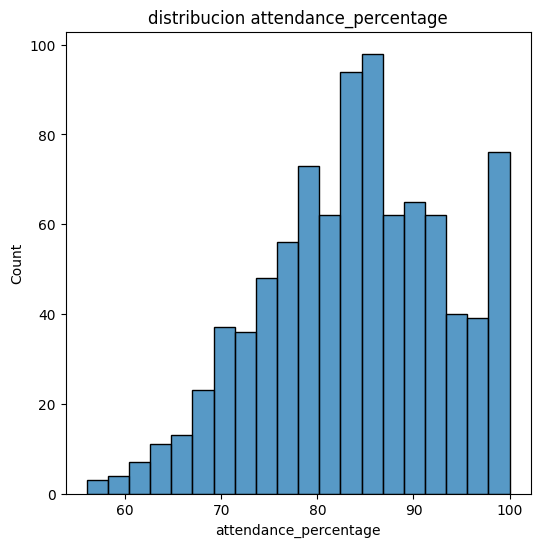

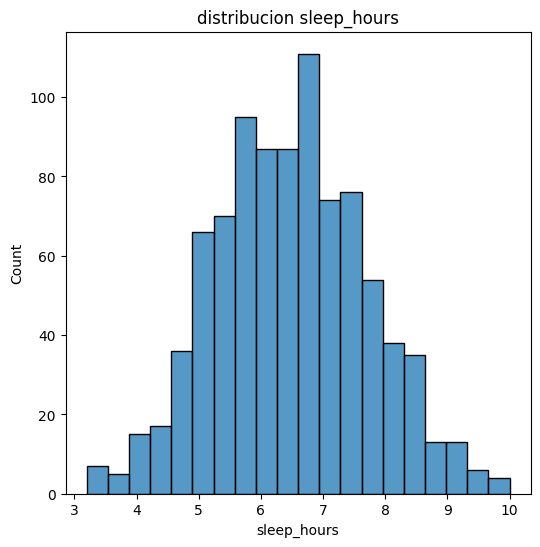

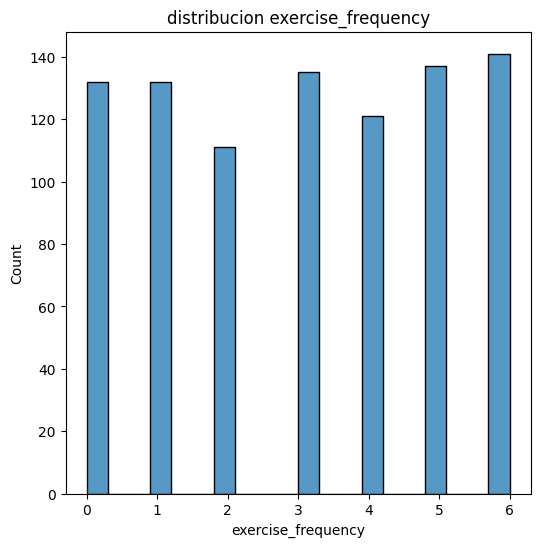

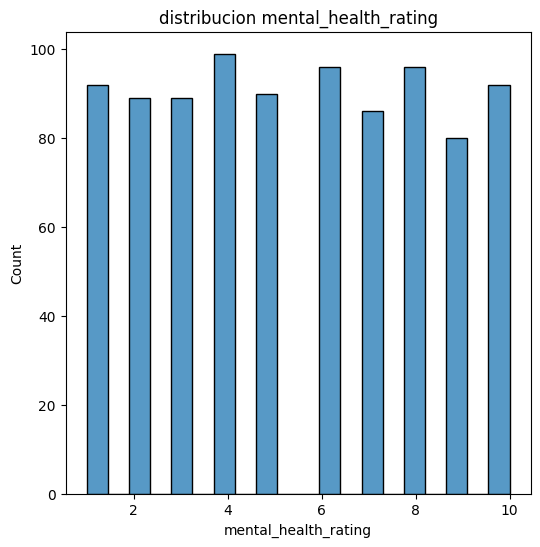

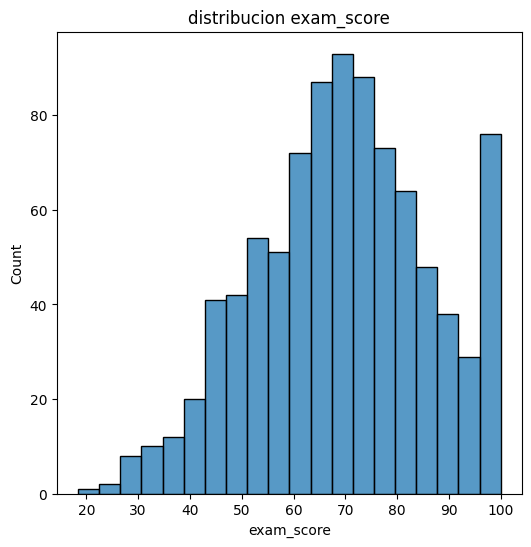

In [119]:
for i in data_numerico:
    histograma(data, i)

In [ ]:
#Usaremos solo dos variables caterogicas que son "internet_quality" y "gender" ya que podrian ser relevante para analizar el modelo
#definiremos de la siguiente manera:
internet_quality = {"Poor": 1, "Average": 2, "Good": 3} # 1 si el internet es malo, 2 si es regular, 3 si es bueno
gender = {"Female": 0, "Male": 1}  # 0 si es mujer, 1 si es hombre

In [121]:
data["internet"] = data["internet_quality"].map(internet_quality)
data["sex"] = data["gender"].map(gender)

In [ ]:
# Eliminaremos el resto de las columnas categoricas ya que no seran relevantes para el analisis de regresion
data = data.drop(columns = ["gender","part_time_job","diet_quality","parental_education_level","internet_quality","extracurricular_participation"])

In [123]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    909 non-null    int64  
 1   study_hours_per_day    909 non-null    float64
 2   social_media_hours     909 non-null    float64
 3   netflix_hours          909 non-null    float64
 4   attendance_percentage  909 non-null    float64
 5   sleep_hours            909 non-null    float64
 6   exercise_frequency     909 non-null    int64  
 7   mental_health_rating   909 non-null    int64  
 8   exam_score             909 non-null    float64
 9   internet               909 non-null    int64  
 10  sex                    873 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 85.2 KB


In [124]:
#eliminar valores nulos
for col in data.columns:
    data = data[data[col].notna()]

In [125]:
data.isnull().sum()

age                      0
study_hours_per_day      0
social_media_hours       0
netflix_hours            0
attendance_percentage    0
sleep_hours              0
exercise_frequency       0
mental_health_rating     0
exam_score               0
internet                 0
sex                      0
dtype: int64

In [127]:
data #dataset a trabajar

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,internet,sex
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,2,0.0
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,2,0.0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,1,1.0
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,3,0.0
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1,3,0.0
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9,2,0.0
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4,3,1.0
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7,2,1.0


<Axes: >

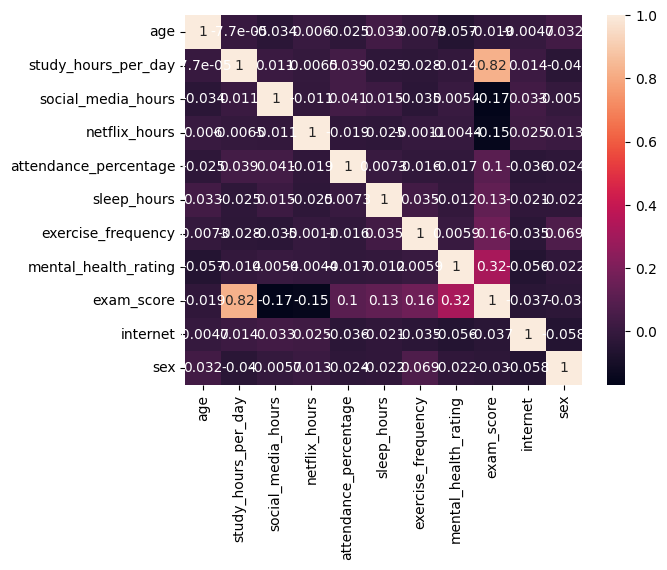

In [128]:
sns.heatmap(data.corr(), annot = True) #veamos las correlaciones entre todas las variables numéricas

# Selection Feature

In [129]:
X = data.drop(columns= "exam_score") #variable X seran las feactures (variables independientes)
y = data["exam_score"]      #variable y sera la variable objetivo (dependiente)

# Model training

In [ ]:
# librerias para este modelo
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#separamos los datos en el conjunto train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((698, 10), (175, 10), (698,), (175,))

In [ ]:
#estandarizamos las feactures
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X_train)  #transformamos los datos de entrenamiento

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(x_scaler, y_train)  #training del modelo
linear_regression.score(x_scaler, y_train)  #obtenemos el score del modelo

0.9039593076951614

In [ ]:
rid = Ridge(alpha=0.2) # regularizador least squares L2
rid.fit(x_scaler, y_train)
rid.score(x_scaler, y_train)

0.9039592329592765

In [ ]:
las = Lasso(alpha=0.2) # regularizador general L1
las.fit(x_scaler, y_train)
las.score(x_scaler, y_train)

0.9027990364365215

In [138]:
#evaluamos el modelo con cross validation
cv = cross_validate(linear_regression, x_scaler, y_train)["test_score"]
print("promedio de cross validation:", cv.mean().round(3), "desviacion estandar de cross validation:", cv.std().round(3))

promedio de cross validation: 0.896 desviacion estandar de cross validation: 0.026


# Resultados

In [ ]:
# usar las metricas

In [ ]:
#grafico de la regresion lineal